# Lab 8: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 8.A: Decision Trees (50% of grade)

The following code is copied from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py. You should be able to run the code without error messages.

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
import pydotplus
from IPython.display import Image,display
from sklearn.cross_validation import train_test_split


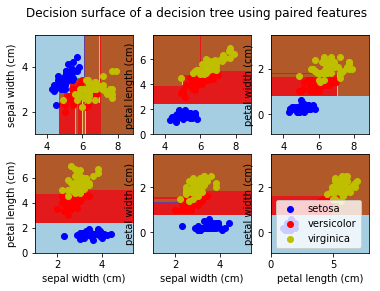

In [4]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.

**ANSWER 1**
The code is using the iris data to create a bunch of decision trees. Specifically, it is using parts of the data using all the pair of the 4 attributes(ie first and second, first and third ... etc) and first creating a decision tree of all of the 150 iris data points we have then using the decision tree to predict the color of each region of the plot grid to guess what type the region would end of being (setosa, versicolor, virginica). The code also plots the all the points. We can see it is not overfittes by how for some points it may guess a specific region to be one color but the point in the region is another color.

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

 

It took 0.001276 seconds to train decision tree

The accuracy of decision tree with test data is 0.940000
The confusion matrix for the given tree is:
[[19  0  0]
 [ 0 16  1]
 [ 0  2 12]]

The accuracy of decision tree with training data is 1.000000

The accuracy of KNN using 3 neighbors of test data is 0.980000
There are 15 nodes in the decision tree and has depth of 6

IGNORE FOLLOWING WARNINGS AS DEAL WITH MAC AND GRAPHVIZ ISSUES



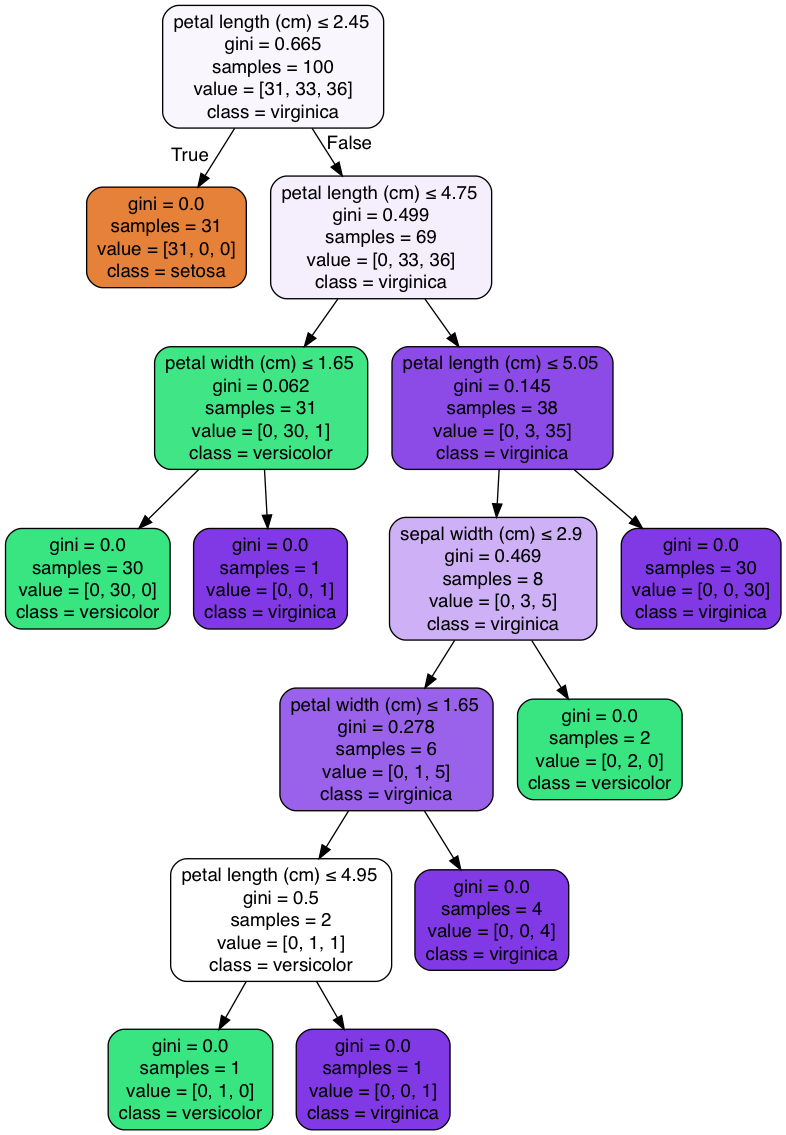

In [58]:
X = iris.data[:, :]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
start=time.time()
# Train
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train);
end=time.time()
print ("It took %f seconds to train decision tree"%(end-start))
#Accuracy with Test
accuracyDT=clf.score(X_test,y_test)
print ("\nThe accuracy of decision tree with test data is %f" %accuracyDT)
#Confusion
pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred)
print ("The confusion matrix for the given tree is:")
print (cnf_matrix)
#Accuracy Train
accuracyDT2=clf.score(X_train,y_train)
print ("\nThe accuracy of decision tree with training data is %f" %accuracyDT2)

#KNN to find best k value
accuracyKNN = 0.0
i = 0
for num in range (1,30):
    k = num   # number of nearest neighbors
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
    predictor.fit(X_train, y_train);
    hold = predictor.score(X_test,y_test)
    if(accuracyKNN< hold):
        accuracyKNN = hold
        i = k
print ("\nThe accuracy of KNN using %d neighbors of test data is %f" % (i,accuracyKNN))
print ("There are %d nodes in the decision tree and has depth of %d"%(clf.tree_.node_count,clf.tree_.max_depth))

print("\nIGNORE FOLLOWING WARNINGS AS DEAL WITH MAC AND GRAPHVIZ ISSUES")
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png("clf.png") 
display(Image(filename="clf.png"))


## Answer 2
- We are seeing a difference bewteen the accuracy of training set and test set as currently the accuracy of training is 100% while test set is 94%. This small difference is due to how the decision tree is not really genearalized as it is fitted (over fitted) perfectly to training so if any outliers are in the training the tree is fitted to outliers thus test set may not fit with 100% accuracy.
- The knn accuracy was slightly better by 4 % as it had accuracy of 98% mostly likely due to over fitting yet both are still great.

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

In [80]:
####ANSWER 3

accuracyReal=0.0;
depth=0;
leaf=0;
#try all different combinations of max depth and min leaf
for k in range(1,6):
    for y in range(1,16):
        newtree=DecisionTreeClassifier(criterion='entropy',max_depth=k,min_samples_leaf=y)
        newtree.fit(X_train, y_train);
        #Accuracy with Test
        accuracyhold=newtree.score(X_test,y_test)
        if(accuracyhold>accuracyReal):
            accuracyReal=accuracyhold
            depth=k
            leaf=y
print("The best accuracy is %f when criterion is entropy, max_depth is %d, and min_samples_leaf is %d"%(accuracyReal,depth,leaf))

accuracyReal=0.0;
depth=0;
leaf=0;
#try all different combinations of max depth and min leaf
for y in range(1,16):
    for k in range(1,10):
        newtree=DecisionTreeClassifier(criterion='gini',max_depth=k,min_samples_leaf=y)
        newtree.fit(X_train, y_train);
        #Accuracy with Test
        accuracyhold=newtree.score(X_test,y_test)
        if(accuracyhold>accuracyReal):
            accuracyReal=accuracyhold
            depth=k
            leaf=y
print("\nThe best accuracy is %f when criterion is gini, max_depth is %d, and min_samples_leaf is %d"%(accuracyReal,depth,leaf))

The best accuracy is 0.980000 when criterion is entropy, max_depth is 3, and min_samples_leaf is 3

The best accuracy is 0.980000 when criterion is gini, max_depth is 3, and min_samples_leaf is 1


## Lab 8.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [69]:
import pandas as pd
#data set from yhathq: http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html
dfchurn=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")

This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn              object
dtype: object


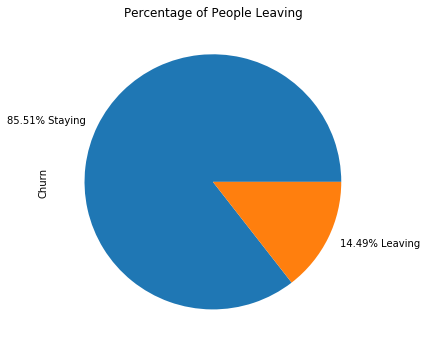

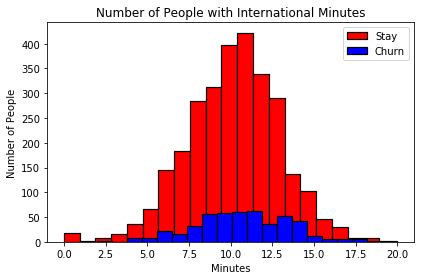

In [145]:
############################################THE FOLLOWING IS CODE USED IN EDA####3###################################
#Rename coulumn name to Churn to make easier to access
dfchurn =dfchurn.rename(columns={'Churn?': 'Churn'})
print (dfchurn.dtypes)
#Create two table of people who leave and people who stay
dfLeave=dfchurn[dfchurn.Churn=="True."]
dfStay=dfchurn[dfchurn.Churn=="False."]
label=["%.2f%% Staying"% (len(dfStay)/len(dfchurn)*100),"%.2f%% Leaving"% (len(dfLeave)/len(dfchurn)*100)]
dfchurn['Churn'].value_counts().plot(kind='pie', figsize=(5,5),labels=label, title="Percentage of People Leaving");


plt.figure()
s="Intl Mins"
plt.hist(dfStay[s], bins=20,edgecolor='black',linewidth=1.2,color='r',label="Stay");
plt.hist(dfLeave[s], bins=20,edgecolor='black',linewidth=1.2,color='b',label="Churn");
plt.title("Number of People with International Minutes")
plt.xlabel("Minutes")
plt.ylabel("Number of People");
plt.legend();

Churn       False.  True.
Int'l Plan               
no            2664    346
yes            186    137


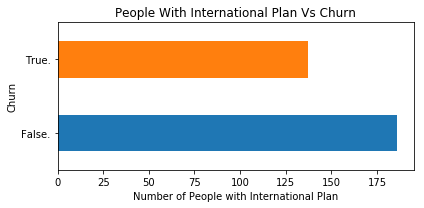

In [144]:
t = pd.crosstab(index=dfchurn["Int'l Plan"],  # Make a crosstab
                     columns=dfchurn["Churn"])    
print (t)
plt.figure()
dfInt=dfchurn[dfchurn["Int'l Plan"]=='yes']
dfInt['Churn'].value_counts().plot(kind='barh', figsize=(6,3), title="People With International Plan Vs Churn");
plt.xlabel("Number of People with International Plan")
plt.ylabel("Churn");



## QUESTIONS 5-7 Prep of DATA

In [73]:
#The states are encoded into 50 seperate binary columns of all states and then are joined to the original churn data
df_states = pd.get_dummies(dfchurn['State'])
dfChurn2 = dfchurn.join(df_states)
del dfChurn2['State']
#All yes/no categorical data is replaced with 1,0s which represent the same thing
dfChurn2.replace(['yes', 'no'], [1, 0],inplace=True)

#Phone numbers are too unique to actually learn so removed from data as well as end predict which is not in results
Data = dfChurn2[dfChurn2.columns.difference(['Churn', 'Phone'])]
Results = dfChurn2['Churn']
print (Data.dtypes)

#Split so 1000 is for testing so 1000/3333
X_train, X_test, y_train, y_test = train_test_split(
    Data, Results, test_size=0.3)
print ("\nLength of training data is %d" % len(X_train))
print ("Length of testing data is %d" % len(X_test))

AK                  uint8
AL                  uint8
AR                  uint8
AZ                  uint8
Account Length      int64
Area Code           int64
CA                  uint8
CO                  uint8
CT                  uint8
CustServ Calls      int64
DC                  uint8
DE                  uint8
Day Calls           int64
Day Charge        float64
Day Mins          float64
Eve Calls           int64
Eve Charge        float64
Eve Mins          float64
FL                  uint8
GA                  uint8
HI                  uint8
IA                  uint8
ID                  uint8
IL                  uint8
IN                  uint8
Int'l Plan          int64
Intl Calls          int64
Intl Charge       float64
Intl Mins         float64
KS                  uint8
                   ...   
MT                  uint8
NC                  uint8
ND                  uint8
NE                  uint8
NH                  uint8
NJ                  uint8
NM                  uint8
NV          

**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

In [104]:
####%%%%ANSWER 5%%%%%####
bestAccuracy=0.0
bestMetric=""
bestK=0
bestWeight=""
metrics=["euclidean","chebyshev","manhattan",]
#Try all differnt metrics
for value in metrics:
    #Default 
    accuracyKNN1 = 0.0
    i = 0
    #Try differnent number of neighbors to find best num
    for num in range (1,30):
        k = num   # number of nearest neighbors
        predictor = neighbors.KNeighborsClassifier(n_neighbors = k,metric=value)
        predictor.fit(X_train, y_train);
        accuracy_test = predictor.score(X_test,y_test)
        if(accuracyKNN1 < accuracy_test):
            accuracyKNN1 = accuracy_test
            i = k
    print ("The best accuracy is %f using uniform weight, k=%d, and metric as %s" %(accuracyKNN1,i,value))
    #Using weighted neighbors
    accuracyKNN2 = 0.0
    i2 = 0
    for num in range (1,30):
        k = num   # number of nearest neighbors
        predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights="distance",metric=value)
        predictor.fit(X_train, y_train);
        accuracy_test = predictor.score(X_test,y_test)
        if(accuracyKNN2 < accuracy_test):
            accuracyKNN2 = accuracy_test
            i2 = k
    print ("The best accuracy is %f using distance weight, k=%d, and metric as %s" %(accuracyKNN2,i2,value))
    if (accuracyKNN1<accuracyKNN2):
        if(bestAccuracy<accuracyKNN2):
            bestAccuracy=accuracyKNN2
            bestK=i2;
            bestMetric=value
            bestWeight="distance"
        
    else :
        if(bestAccuracy<accuracyKNN1):
            bestAccuracy=accuracyKNN1
            bestK=i;
            bestMetric=value
            bestWeight="uniform"
print("\nAfter trying different combination best parameters were when \nweight=%s, metric=%s, and k= %d"
          %(bestWeight,bestMetric,bestK)) 
print("Which resulted in an accuracy of %f" % bestAccuracy)
#Create predictor that ended up being the best
predictor=neighbors.KNeighborsClassifier(n_neighbors = bestK, weights=bestWeight,metric=bestMetric)
predictor.fit(X_train, y_train);
#Confusion
pred = predictor.predict(X_test)
cnf_matrixKNN = confusion_matrix(y_test, pred)
print ("\nThe confusion matrix then ends up being")
print (cnf_matrixKNN)

The best accuracy is 0.879000 using uniform weight, k=4, and metric as euclidean
The best accuracy is 0.879000 using distance weight, k=12, and metric as euclidean
The best accuracy is 0.872000 using uniform weight, k=15, and metric as chebyshev
The best accuracy is 0.872000 using distance weight, k=16, and metric as chebyshev
The best accuracy is 0.880000 using uniform weight, k=7, and metric as manhattan
The best accuracy is 0.881000 using distance weight, k=15, and metric as manhattan

After trying different combination best parameters were when 
weight=distance, metric=manhattan, and k= 15
Which resulted in an accuracy of 0.881000

The confusion matrix then ends up being
[[850   2]
 [117  31]]


## ANSWER 5
- In our case we can train the Knn classifier based upon many different parameters but to me the most important ones were the number of nearest neighbors, the way each neighbor is weighted, and lastly the way to calculate the distance bewteen two points.
- In the end we saw that when we make the classifier look at 15 nearest neighbors, make closer neighbors be weighted more, and lastly we calculate the distance based upon manhattan metric.

**Question 6**. Train and test a decision tree. Do it on the sane traing-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

In [106]:
accuracyReal=0.0;
depth=0;
leaf=0;
pred=0
depths=list(range(1,10))
depths.append(None)
#try all different combinations of max depth and min leaf for entropy
for k in depths:
    for y in range(1,20):
        newtree=DecisionTreeClassifier(criterion='entropy',max_depth=k,min_samples_leaf=y)
        newtree.fit(X_train, y_train);
        #Accuracy with Test
        accuracyhold=newtree.score(X_test,y_test)
        if(accuracyhold>accuracyReal):
            accuracyReal=accuracyhold
            depth=k
            leaf=y
            pred = newtree.predict(X_test)
if(k!=None):
    print("The best accuracy is %f when criterion is entropy, max_depth is %d, and min_samples_leaf is %d"%(accuracyReal,depth,leaf))
else :
    print("The best accuracy is %f when criterion is entropy, max_depth is None, and min_samples_leaf is %d"%(accuracyReal,leaf))
accuracyReal=0.0;
depth=0;
leaf=0;
#try all different combinations of max depth and min leaf for when gini
for k in depths:
    for y in range(1,20):
        newtree=DecisionTreeClassifier(criterion='gini',max_depth=k,min_samples_leaf=y)
        newtree.fit(X_train, y_train);
        #Accuracy with Test
        accuracyhold=newtree.score(X_test,y_test)
        if(accuracyhold>accuracyReal):
            accuracyReal=accuracyhold
            depth=k
            leaf=y
            pred = newtree.predict(X_test)
if(k!=None):
    print("The best accuracy is %f when criterion is gini, max_depth is %d, and min_samples_leaf is %d"%(accuracyReal,depth,leaf))
else :
    print("The best accuracy is %f when criterion is gini, max_depth is None, and min_samples_leaf is %d"%(accuracyReal,leaf))

The best accuracy is 0.936000 when criterion is entropy, max_depth is None, and min_samples_leaf is 5
The best accuracy is 0.939000 when criterion is gini, max_depth is None, and min_samples_leaf is 1


## Answer 6
- We saw that the best decision tree classfier was made when we used gini as our criterion( a calculation to determine qualitly of a split), when we allowed our tree to grow however it wants by not restricting depth, with min sample leaf as 1.
- When comparing KNN classifier and decision tree classfier we see that the decision tree classfier did much better as it increased about 6 % which is very significant even though it seems just a little since we are getting closer to being a perfect predictor.

**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try try to prevent churn. The cost of each contact is \$10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is \$30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

In [114]:
cnf_matrixDT = confusion_matrix(y_test, pred)
print ("The confusion matrix for the tree is\n" ,cnf_matrixDT)

# Calculate Profit
false = cnf_matrixDT[0][1] #People tree predicts are going to churn but are not really
true = cnf_matrixDT[1][1] # People who are predicted to churn and actually do 
total = false*(-10) + true*(30)

print ("Expected Profit Using Decision Tree: $", total)


print ("\nThe confusion matrix for KNN is\n" ,cnf_matrixKNN)

# Calculate Profit
false = cnf_matrixKNN[0][1] #People tree predicts are going to churn but are not really
true = cnf_matrixKNN[1][1] # People who are predicted to churn and actually do 
total = false*(-10) + true*(30)

print ("Expected Profit Using KNN $", total)


The confusion matrix for the tree is
 [[838  14]
 [ 47 101]]
Expected Profit Using Decision Tree: $ 2890

The confusion matrix for KNN is
 [[850   2]
 [117  31]]
Expected Profit Using KNN $ 910


In [119]:
##Another Learning
from sklearn.gaussian_process import GaussianProcessClassifier
learn3=GaussianProcessClassifier()
learn3.fit(X_train,y_train)
print ("Accuracy using Gaussian is ", learn3.score(X_test,y_test))

predG=learn3.predict(X_test)
cnf_matrixGC = confusion_matrix(y_test, predG)
print ("The confusion matrix for the tree is\n" ,cnf_matrixGC)

# Calculate Profit
false = cnf_matrixGC[0][1] #People tree predicts are going to churn but are not really
true = cnf_matrixGC[1][1] # People who are predicted to churn and actually do 
total = false*(-10) + true*(30)

print ("Expected Profit Using Gaussian Classifier: $", total)


Accuracy using Gaussian is  0.827
The confusion matrix for the tree is
 [[814  38]
 [135  13]]
Expected Profit Using Gaussian Classifier: $ 10


 ## Anwser 7
 - After running different classfier we can see that the decison tree classifier is the best as it is most accurate and produces the greatest profit for company.
 - I could not create a classifier that will do a better job as the decison tree already has a high accuracy and is due to the fact we let it grow as big as it wants by not limiting it's depth.